This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

https://www.kaggle.com/uciml/pima-indians-diabetes-database/

## Ucitavanje podataka

In [1]:
import numpy as np 
import pandas as pd
data = pd.read_csv('data/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
data.shape

(768, 9)

## Sredjivanje naziva kolona

In [3]:
data.columns = [col.lower() for col in data]
data.rename(columns={
        'bloodpressure': 'blood_pressure', 
        'skinthickness': 'skin_thickness',
        'diabetespedigreefunction': 'diabetes_pedigree_function'
    }, inplace=True)
data.columns

Index(['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin',
       'bmi', 'diabetes_pedigree_function', 'age', 'outcome'],
      dtype='object')

## Vizuelizacija podataka

In [4]:
%matplotlib inline

outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

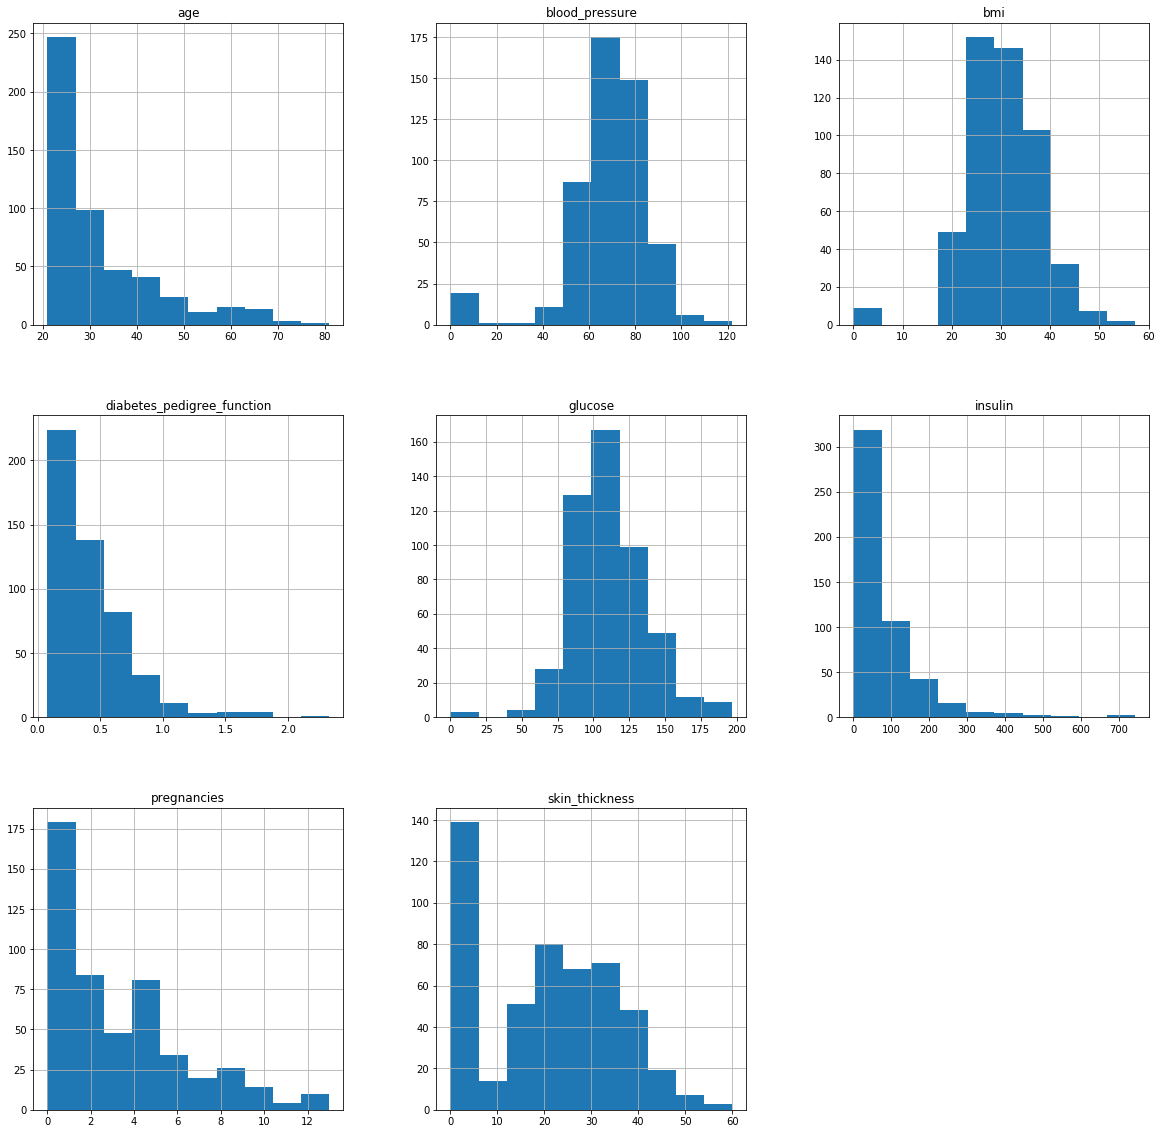

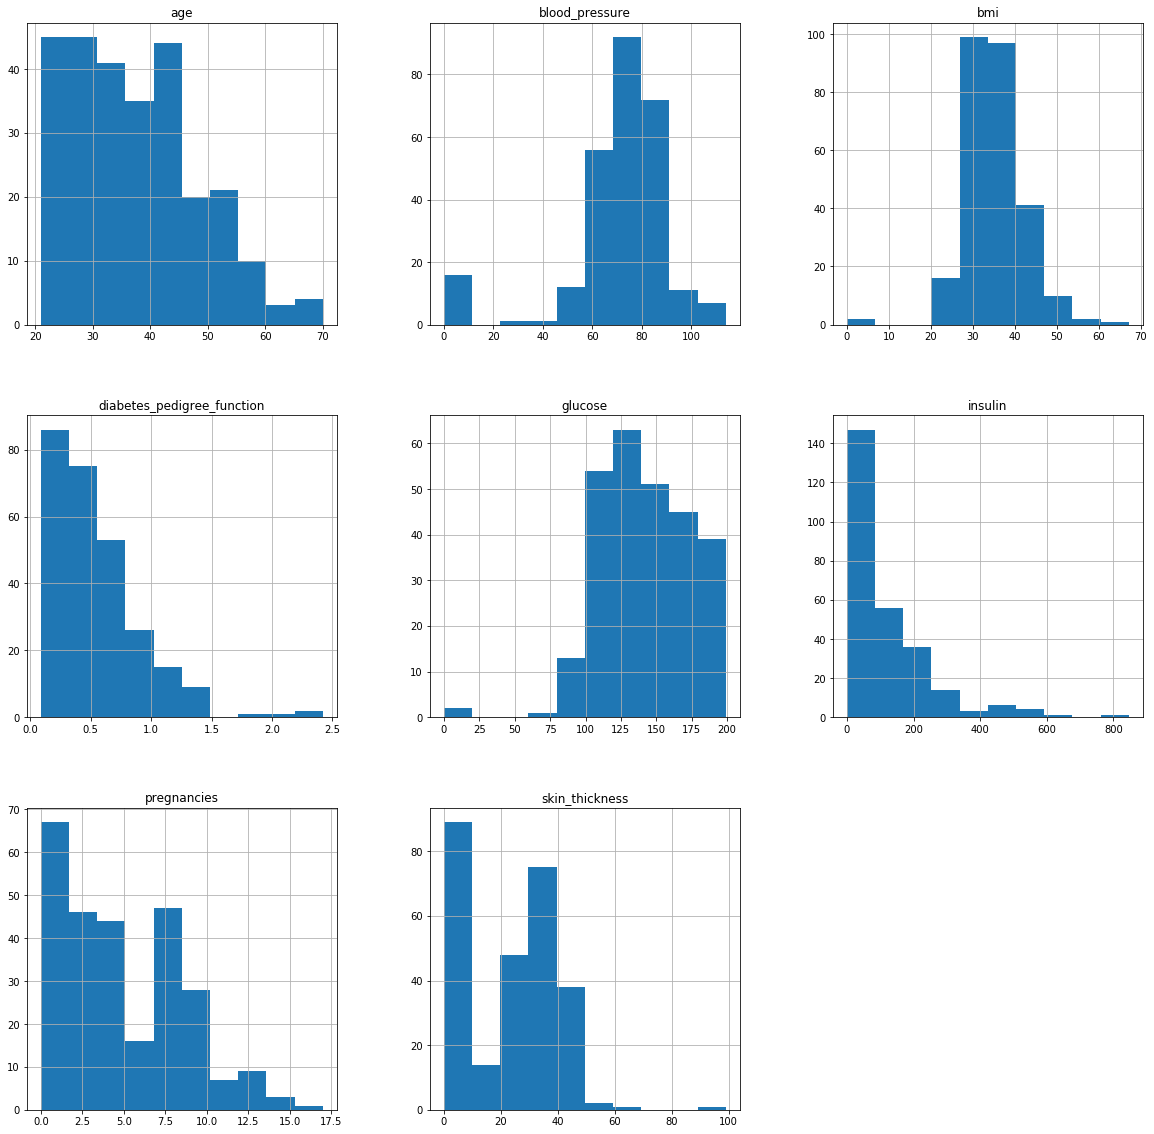

In [5]:
data.groupby('outcome').hist(figsize=(20, 20))

## Sredjivanje podatka

Prvo proveravamo da li nedostaju vrednosti i kakvi su nam podaci.
Krvi pritisak, bmi telesni stepen i glukoza ne mogu da budu 0. Imamo vise opcija ali u ovom slucaju najbolje je da ne koristim te podatke... Zbir redova gde postoje 0:

In [6]:
data.isna().sum()

pregnancies                   0
glucose                       0
blood_pressure                0
skin_thickness                0
insulin                       0
bmi                           0
diabetes_pedigree_function    0
age                           0
outcome                       0
dtype: int64

Uklanjanje redova sa losim vrednostima

In [7]:
new_data = data[(data.blood_pressure != 0) & (data.bmi != 0) & (data.glucose != 0) & (data.skin_thickness != 0) & (data.insulin != 0)]

In [8]:
new_data.shape

(392, 9)

## Vizuelizacija podataka posle sredjivanja

outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

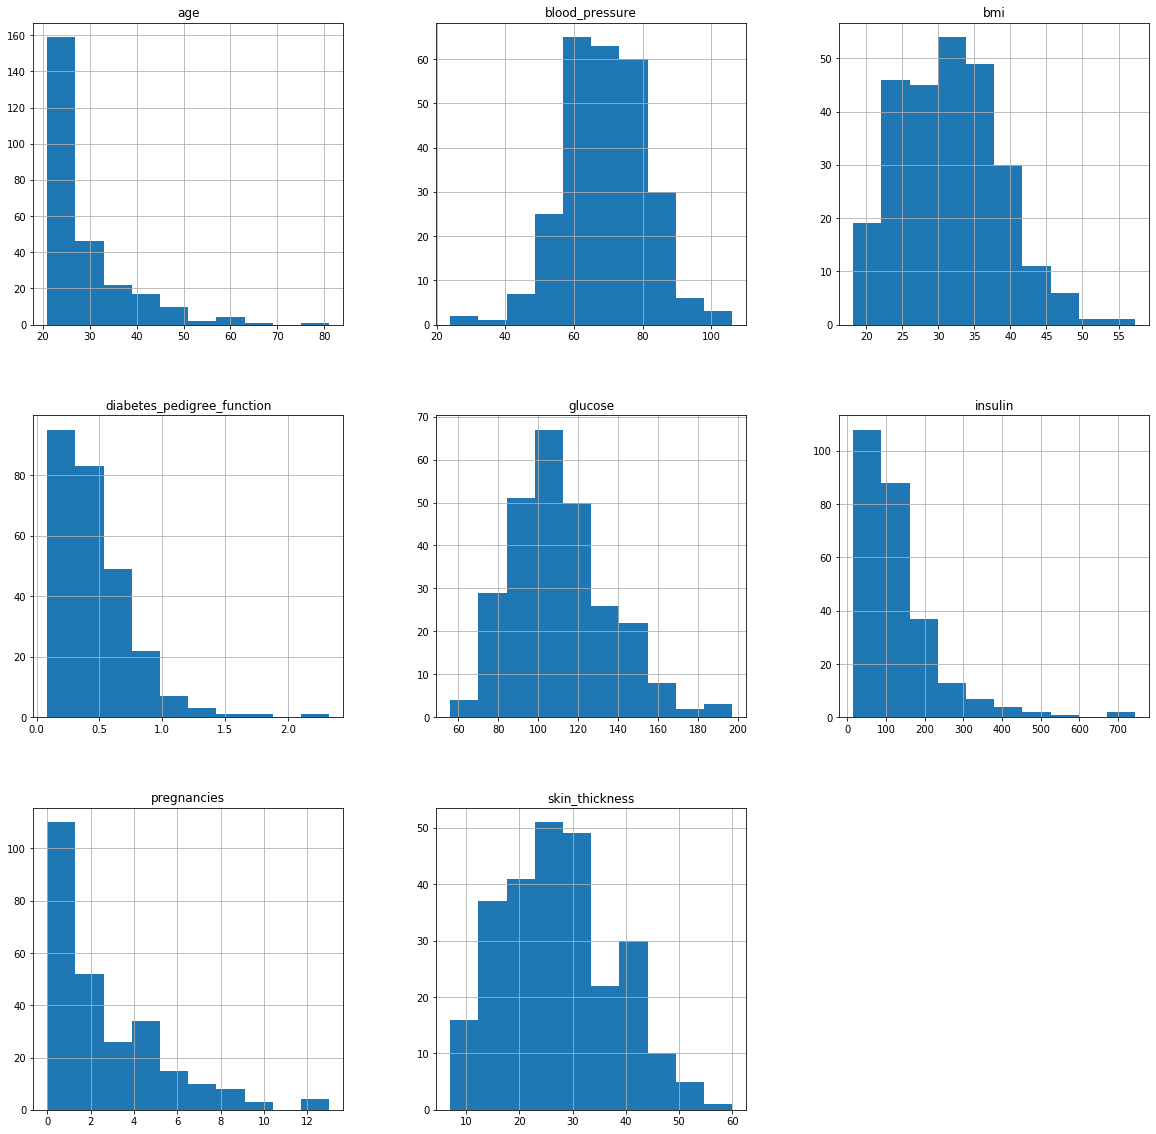

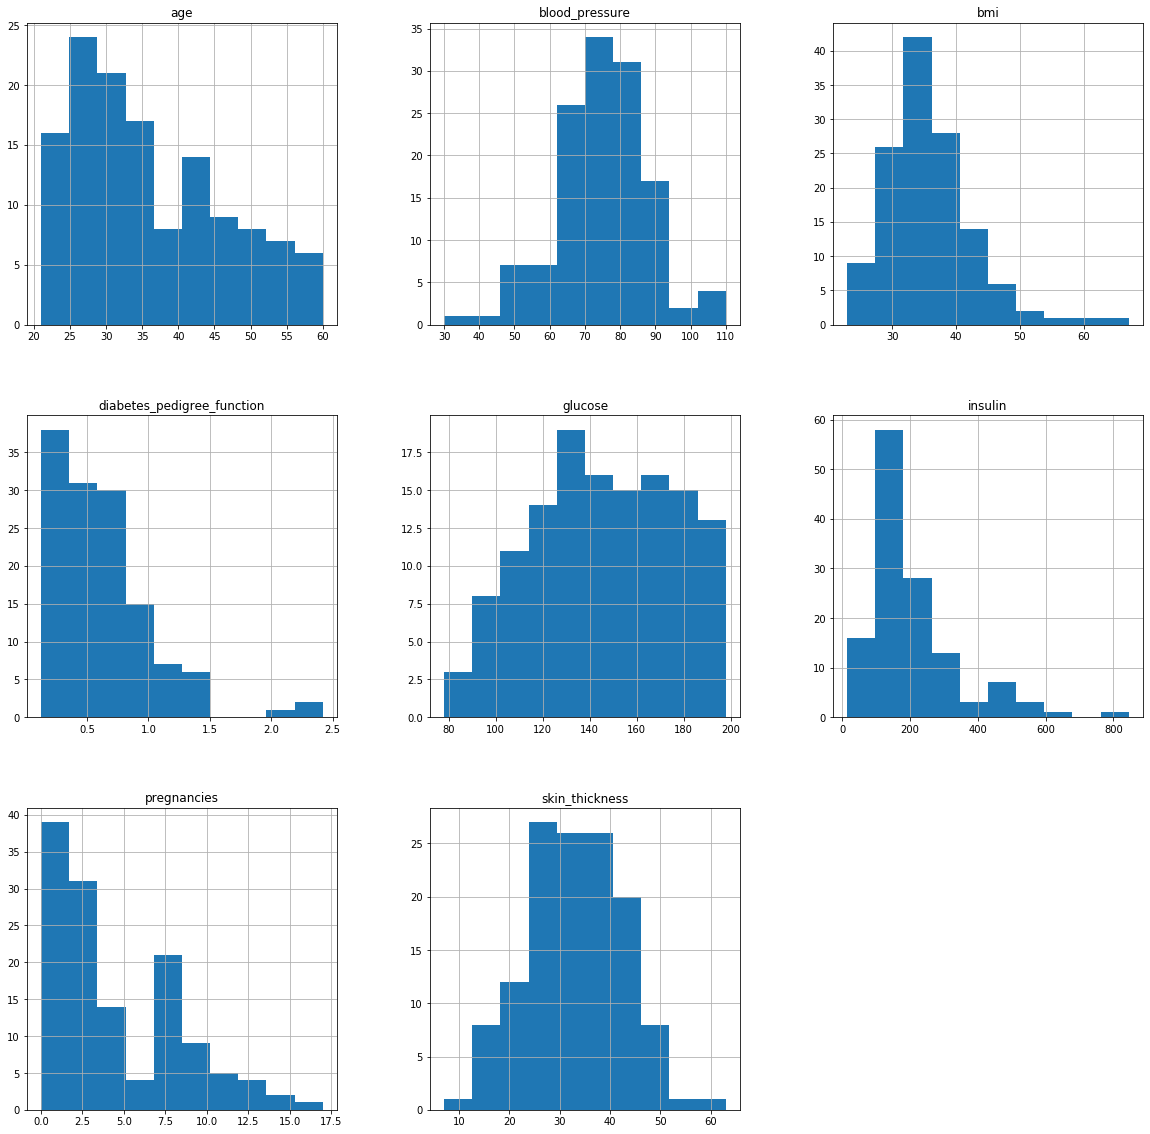

In [9]:
new_data.groupby('outcome').hist(figsize=(20, 20))

### Deljenje podataka na atribute i ciljanju vrednost

In [10]:
features = data[["pregnancies","glucose","blood_pressure", "insulin", "bmi", "skin_thickness", "diabetes_pedigree_function", "age" ]]
target = data["outcome"]

### Provera kvaliteta atributa

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

                      Atribut     Vrednost
3                     insulin  2175.565273
1                     glucose  1411.887041
7                         age   181.303689
4                         bmi   127.669343
0                 pregnancies   111.519691
5              skin_thickness    53.108040
2              blood_pressure    17.605373
6  diabetes_pedigree_function     5.392682


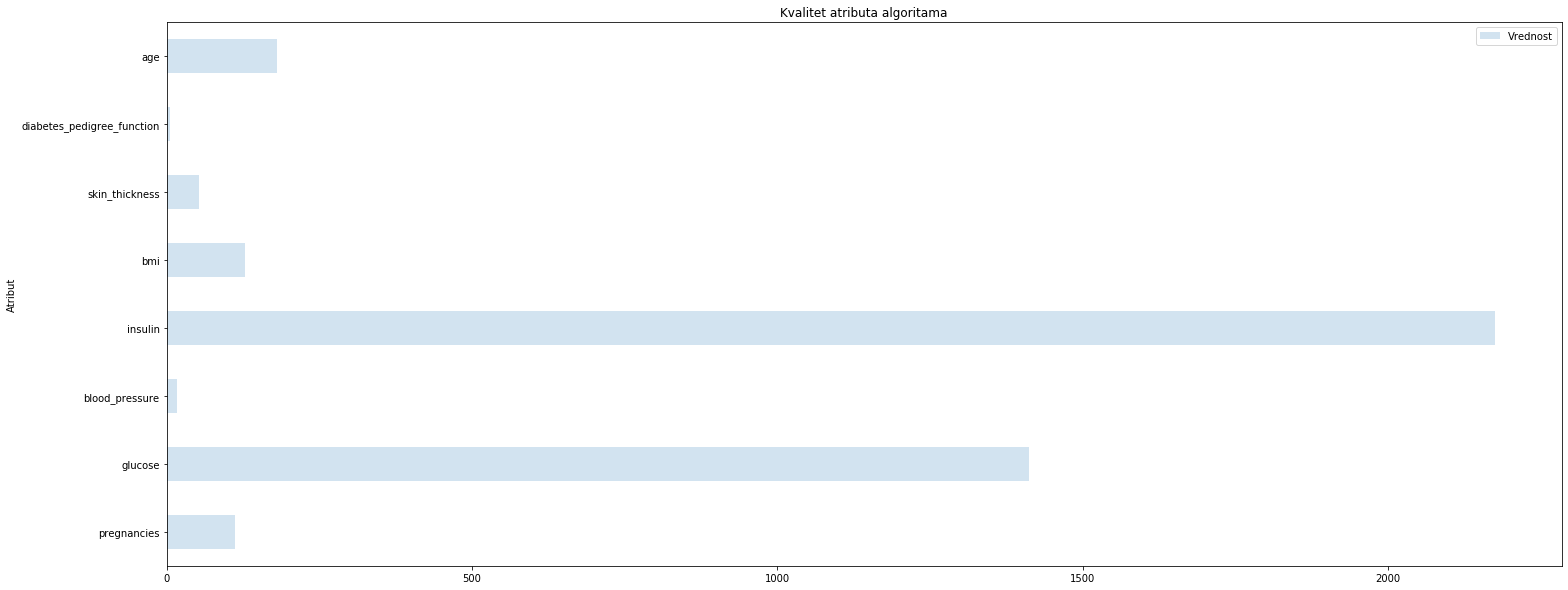

In [12]:
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(features,target)

dfScores = pd.DataFrame(fit.scores_)
dfColumns = pd.DataFrame(features.columns) 
featureScores = pd.concat([dfColumns,dfScores],axis=1)
featureScores.columns = ['Atribut','Vrednost']  

# prikaz atributa i njihove procene
print(featureScores.nlargest(8,'Vrednost'))
featureScores.plot(kind='barh', x='Atribut', y='Vrednost', figsize=(25,10), alpha=0.2, title='Kvalitet atributa algoritama')

Za predikciju uzimamo samo sledece atribute:

In [13]:
features = data[["insulin", "glucose", "age", "bmi", "pregnancies"]]
target = data["outcome"]

### Prikaz po atributu insulin

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

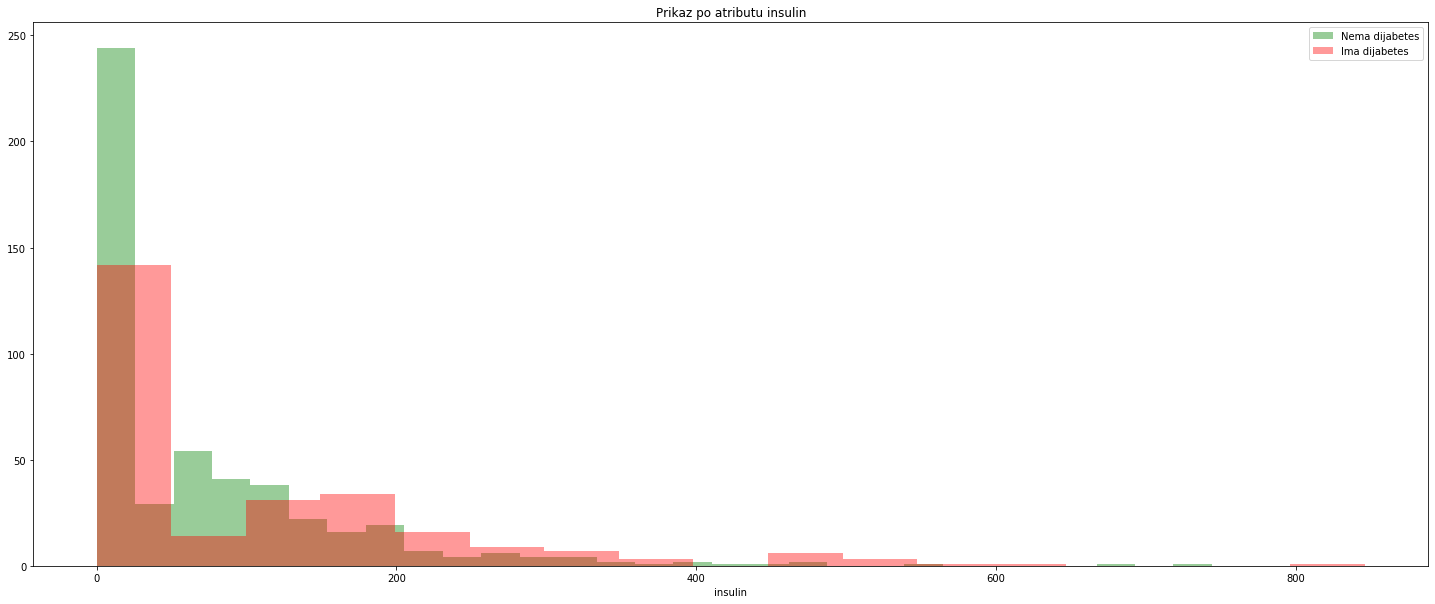

In [15]:
plt.figure(figsize=(25,10))

sns.distplot(data[data.outcome == 0]['insulin'], color='green', kde=False, label='Nema dijabetes')
sns.distplot(data[data.outcome == 1]['insulin'], color='red', kde=False, label='Ima dijabetes')

plt.legend()
plt.title('Prikaz po atributu insulin')
plt.show()

### Prikaz po atributu glucose

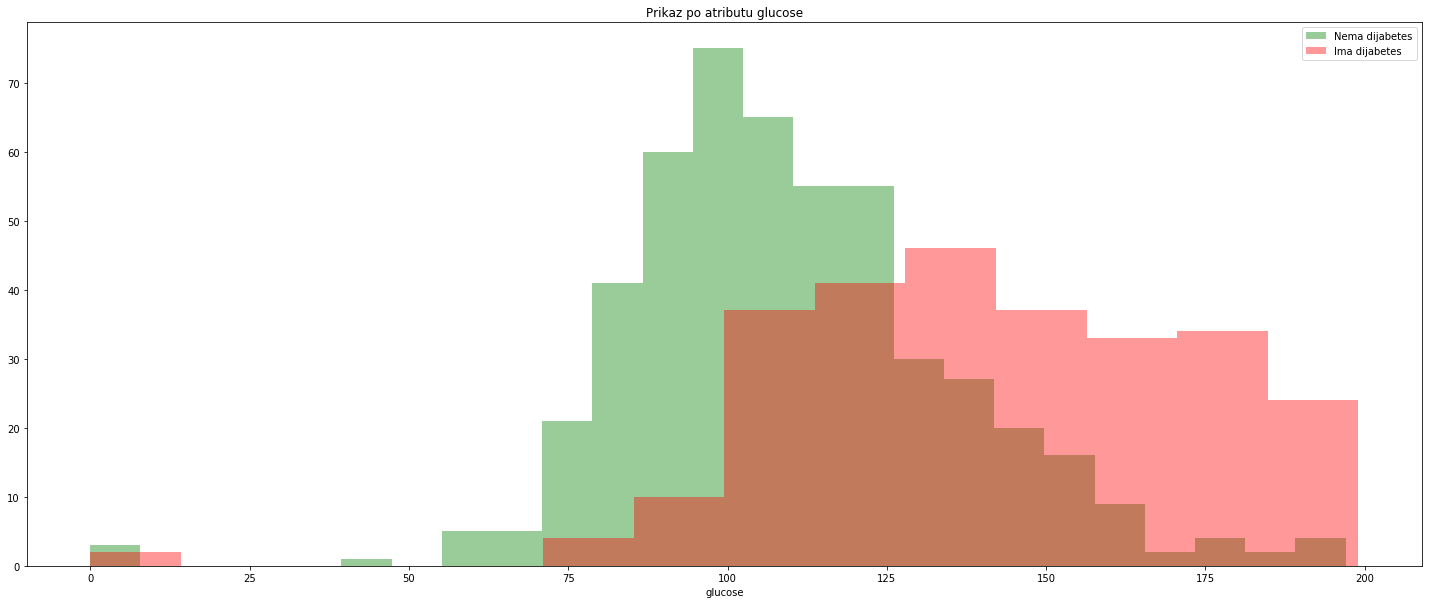

In [16]:
plt.figure(figsize=(25,10))

sns.distplot(data[data.outcome == 0]['glucose'], color='green', kde=False, label='Nema dijabetes')
sns.distplot(data[data.outcome == 1]['glucose'], color='red', kde=False, label='Ima dijabetes')

plt.legend()
plt.title('Prikaz po atributu glucose')
plt.show()

### Prikaz po atributu age

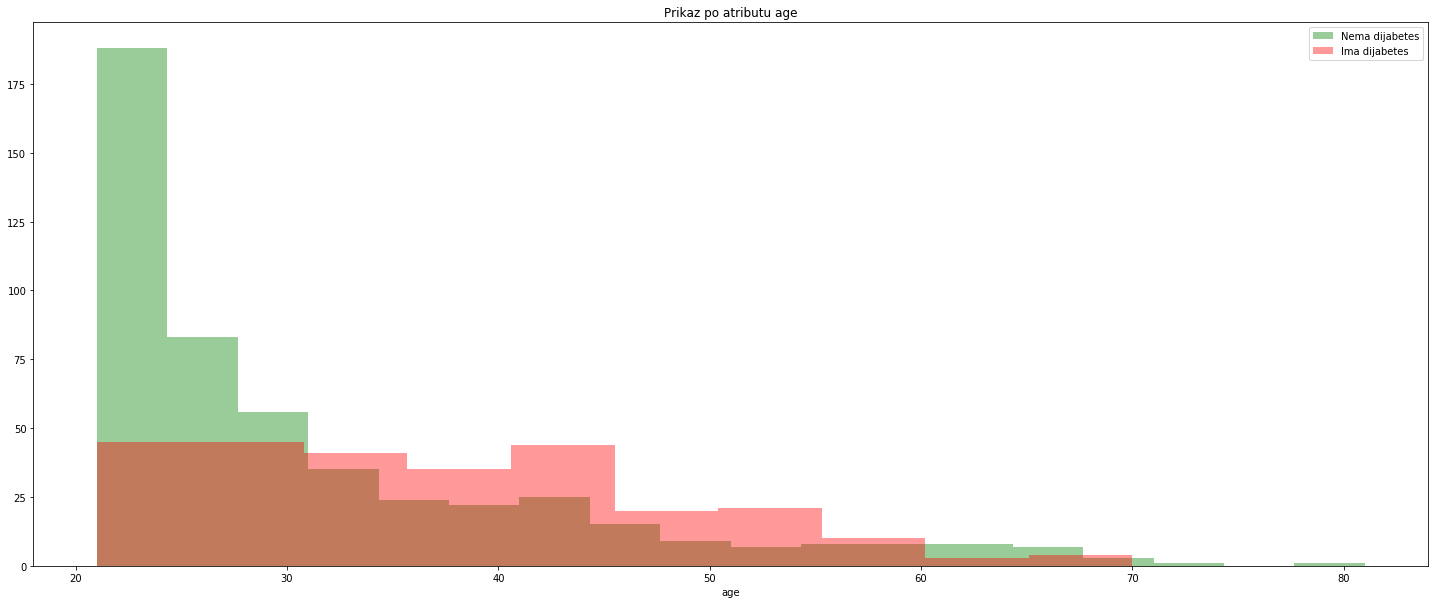

In [17]:
plt.figure(figsize=(25,10))

sns.distplot(data[data.outcome == 0]['age'], color='green', kde=False, label='Nema dijabetes')
sns.distplot(data[data.outcome == 1]['age'], color='red', kde=False, label='Ima dijabetes')

plt.legend()
plt.title('Prikaz po atributu age')
plt.show()

### Prikaz po atributu bmi

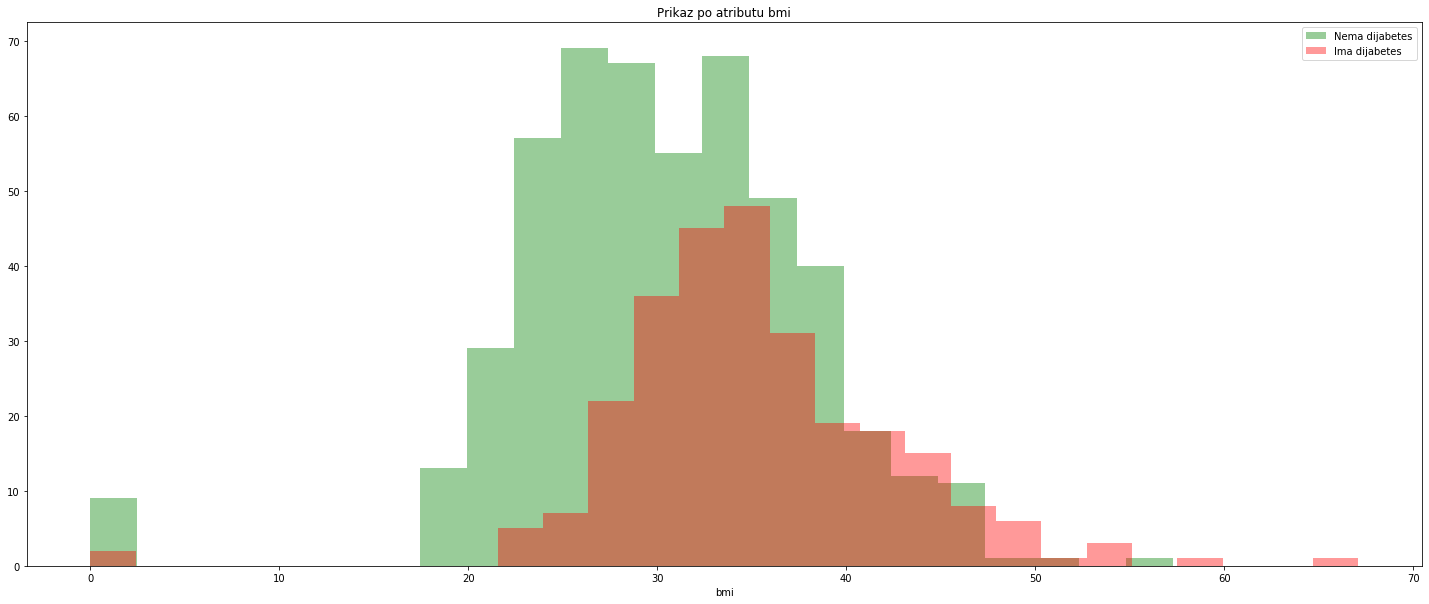

In [18]:
plt.figure(figsize=(25,10))

sns.distplot(data[data.outcome == 0]['bmi'], color='green', kde=False, label='Nema dijabetes')
sns.distplot(data[data.outcome == 1]['bmi'], color='red', kde=False, label='Ima dijabetes')

plt.legend()
plt.title('Prikaz po atributu bmi')
plt.show()

### Prikaz po atributu pregnancies 

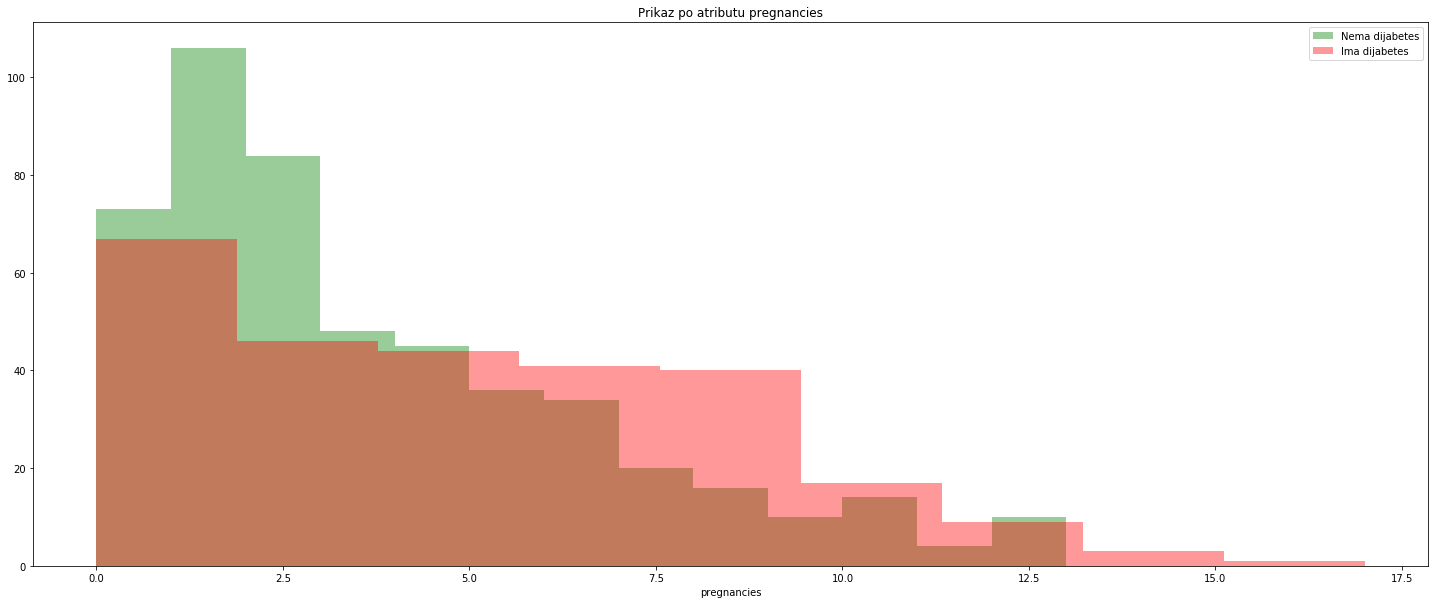

In [19]:
plt.figure(figsize=(25,10))

sns.distplot(data[data.outcome == 0]['pregnancies'], color='green', kde=False, label='Nema dijabetes')
sns.distplot(data[data.outcome == 1]['pregnancies'], color='red', kde=False, label='Ima dijabetes')

plt.legend()
plt.title('Prikaz po atributu pregnancies')
plt.show()

## Deljenje podataka za treniranje modela i predikciju

Ucitavam biblioteku za deljenje podataka i delim podatke procentu 70:30

In [20]:
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)

## Klasifikacija

In [21]:
# dataset za smestanje rezultata

results = pd.DataFrame()

### LogisticRegression

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 500)
model.fit(X_train, y_train)

# predikcija
lr_prediction = model.predict(X_test)

# provera tacnosti
print("Accuracy: {:.3f}".format(accuracy_score(y_test, lr_prediction)*100))
results = results.append({'algoritam' :'LogisticRegression', 'rezultat': accuracy_score(y_test, lr_prediction)*100}, ignore_index=True)

Accuracy: 76.623


### Random Forest 

In [23]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

# predikcija
rf_prediction = model.predict(X_test)

# provera tacnosti
print("Accuracy: {:.3f}".format(accuracy_score(y_test, rf_prediction)*100))
results = results.append({'algoritam' :'RandomForestClassifier', 'rezultat': accuracy_score(y_test, rf_prediction)*100}, ignore_index=True)

Accuracy: 77.922


### DecisionTree

In [24]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# predikcija
dtc_prediction = model.predict(X_test)

# provera tacnosti
print("Accuracy: {:.3f}".format(accuracy_score(y_test, dtc_prediction)*100))
results = results.append({'algoritam' :'DecisionTreeClassifier', 'rezultat': accuracy_score(y_test, dtc_prediction)*100}, ignore_index=True)

Accuracy: 73.593


### NaiveBayes

In [25]:
from sklearn.naive_bayes import GaussianNB


model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# predikcija
nb_prediction = model.predict(X_test)

# provera tacnosti
print("Accuracy: {:.3f}".format(accuracy_score(y_test, nb_prediction)*100))
results = results.append({'algoritam' :'GaussianNB', 'rezultat': accuracy_score(y_test, nb_prediction)*100}, ignore_index=True)

Accuracy: 73.593


### Support Vector Machine

In [26]:
from sklearn.svm import SVC


model = SVC()
model.fit(X_train, y_train)

# predikcija
svc_prediction = model.predict(X_test)

# provera tacnosti
print("Accuracy: {:.3f}".format(accuracy_score(y_test, svc_prediction)*100))
results = results.append({'algoritam' :'SVC', 'rezultat': accuracy_score(y_test, svc_prediction)*100}, ignore_index=True)

Accuracy: 74.892


### K Nearest Neighbour

In [27]:
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier()
model.fit(X_train, y_train)

# predikcija
knn_prediction = model.predict(X_test)

# provera tacnosti
print("Accuracy: {:.3f}".format(accuracy_score(y_test, knn_prediction)*100))
results = results.append({'algoritam' :'KNeighborsClassifier', 'rezultat': accuracy_score(y_test, knn_prediction)*100}, ignore_index=True)

Accuracy: 74.892


In [28]:
# rezultati
results.sort_values(by='rezultat', ascending=False)

,algoritam,rezultat
1,RandomForestClassifier,77.922078
0,LogisticRegression,76.623377
4,SVC,74.891775
5,KNeighborsClassifier,74.891775
2,DecisionTreeClassifier,73.593074
3,GaussianNB,73.593074


<Figure size 432x288 with 0 Axes>

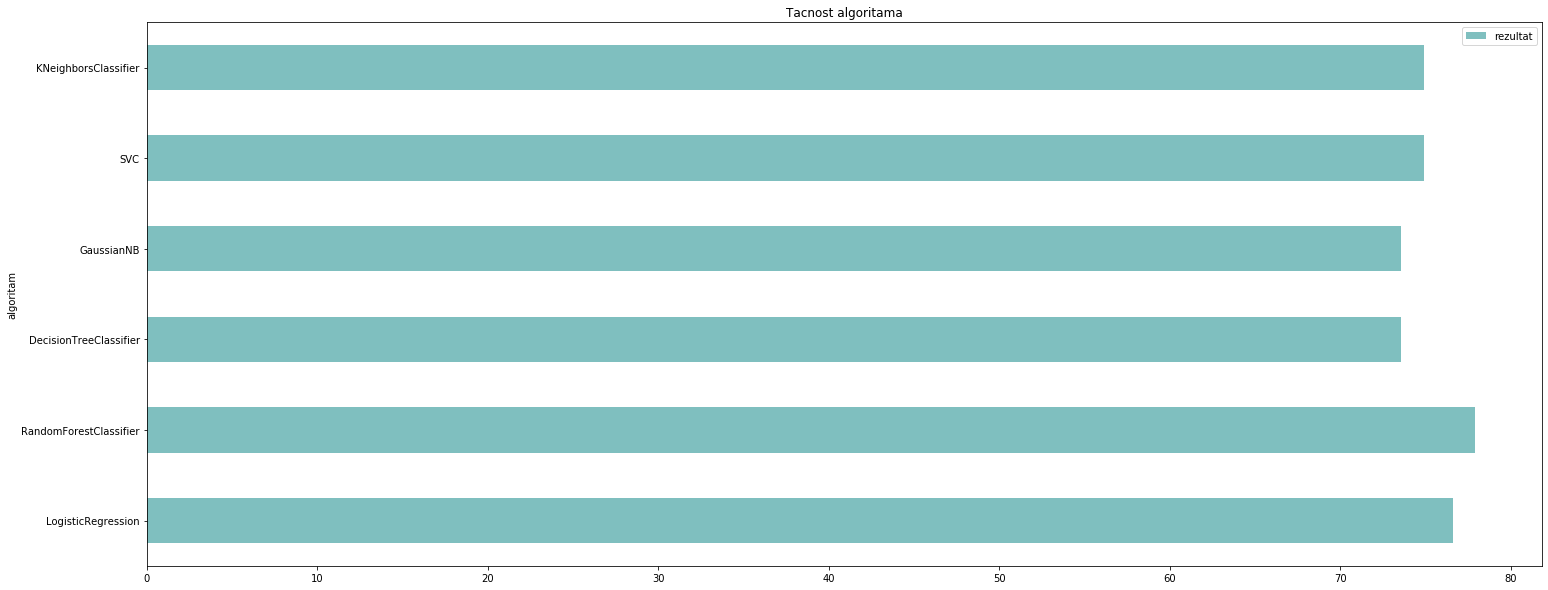

In [29]:
import matplotlib.pyplot as plt

plt.figure();
results.plot(kind='barh', x='algoritam', y='rezultat', figsize=(25,10), alpha=0.5, color='teal', title='Tacnost algoritama')